<a href="https://colab.research.google.com/github/tzev/NYT_Project/blob/main/NYT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 20)
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
927004,2021-01-13,Teton,Wyoming,56039.0,2502,4.0
927005,2021-01-13,Uinta,Wyoming,56041.0,1774,9.0
927006,2021-01-13,Washakie,Wyoming,56043.0,829,23.0


In [ ]:
df[df['state'] == "New York"]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
925661,2021-01-13,Washington,New York,36115.0,1313,20.0
925662,2021-01-13,Wayne,New York,36117.0,3395,48.0
925663,2021-01-13,Westchester,New York,36119.0,80145,1750.0
925664,2021-01-13,Wyoming,New York,36121.0,1905,36.0


In [ ]:
df_nyc = df[df['county'] == "New York City"]

In [ ]:
df_nyc.drop(['fips'], inplace=True, axis=1)
df_nyc

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
565,2020-03-05,New York City,New York,4,0.0
...,...,...,...,...,...
912655,2021-01-09,New York City,New York,481279,25505.0
915900,2021-01-10,New York City,New York,487551,25562.0
919145,2021-01-11,New York City,New York,493306,25635.0
922390,2021-01-12,New York City,New York,498877,25698.0


In [ ]:
df_nyc = df_nyc.sort_values(by='date', ascending = False)

In [ ]:
import numpy as np
df_nyc = df_nyc.sort_values(by='date', ascending = True)
df_nyc['Cases_Difference'] = df_nyc["cases"] - df_nyc["cases"].shift()
df_nyc

,date,county,state,cases,deaths,Cases_Difference
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0
...,...,...,...,...,...,...
912655,2021-01-09,New York City,New York,481279,25505.0,6940.0
915900,2021-01-10,New York City,New York,487551,25562.0,6272.0
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0


In [ ]:
df_nyc = df_nyc.sort_values(by='date', ascending = True)
df_nyc['Deaths_Difference'] = df_nyc["deaths"] - df_nyc["deaths"].shift()
df_nyc

,date,county,state,cases,deaths,Cases_Difference,Deaths_Difference
416,2020-03-01,New York City,New York,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0,0.0
...,...,...,...,...,...,...,...
912655,2021-01-09,New York City,New York,481279,25505.0,6940.0,52.0
915900,2021-01-10,New York City,New York,487551,25562.0,6272.0,57.0
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0,73.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0,63.0


In [ ]:
df_nyc = df_nyc.sort_values(by='date', ascending = False)
df_nyc = df_nyc.head(30)
df_nyc

,date,county,state,cases,deaths,Cases_Difference,Deaths_Difference
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0
922390,2021-01-12,New York City,New York,498877,25698.0,5571.0,63.0
919145,2021-01-11,New York City,New York,493306,25635.0,5755.0,73.0
915900,2021-01-10,New York City,New York,487551,25562.0,6272.0,57.0
912655,2021-01-09,New York City,New York,481279,25505.0,6940.0,52.0
...,...,...,...,...,...,...,...
844505,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
841259,2020-12-18,New York City,New York,377728,24652.0,4408.0,39.0
838014,2020-12-17,New York City,New York,373320,24613.0,3211.0,35.0
834768,2020-12-16,New York City,New York,370109,24578.0,2911.0,17.0


In [ ]:
ny = df[df['state'] == "New York"]
nyc = ny[ny['county']=="New York City"]
cases = nyc["cases"].iloc[-1] - nyc["cases"].iloc[-31]
deaths = nyc["deaths"].iloc[-1] - nyc["deaths"].iloc[-31]
print(f"Total cases in pase 30 days {cases}")
print(f"Total cases in pase 30 days {deaths}") 

Total cases in pase 30 days 141157
Total cases in pase 30 days 1215.0


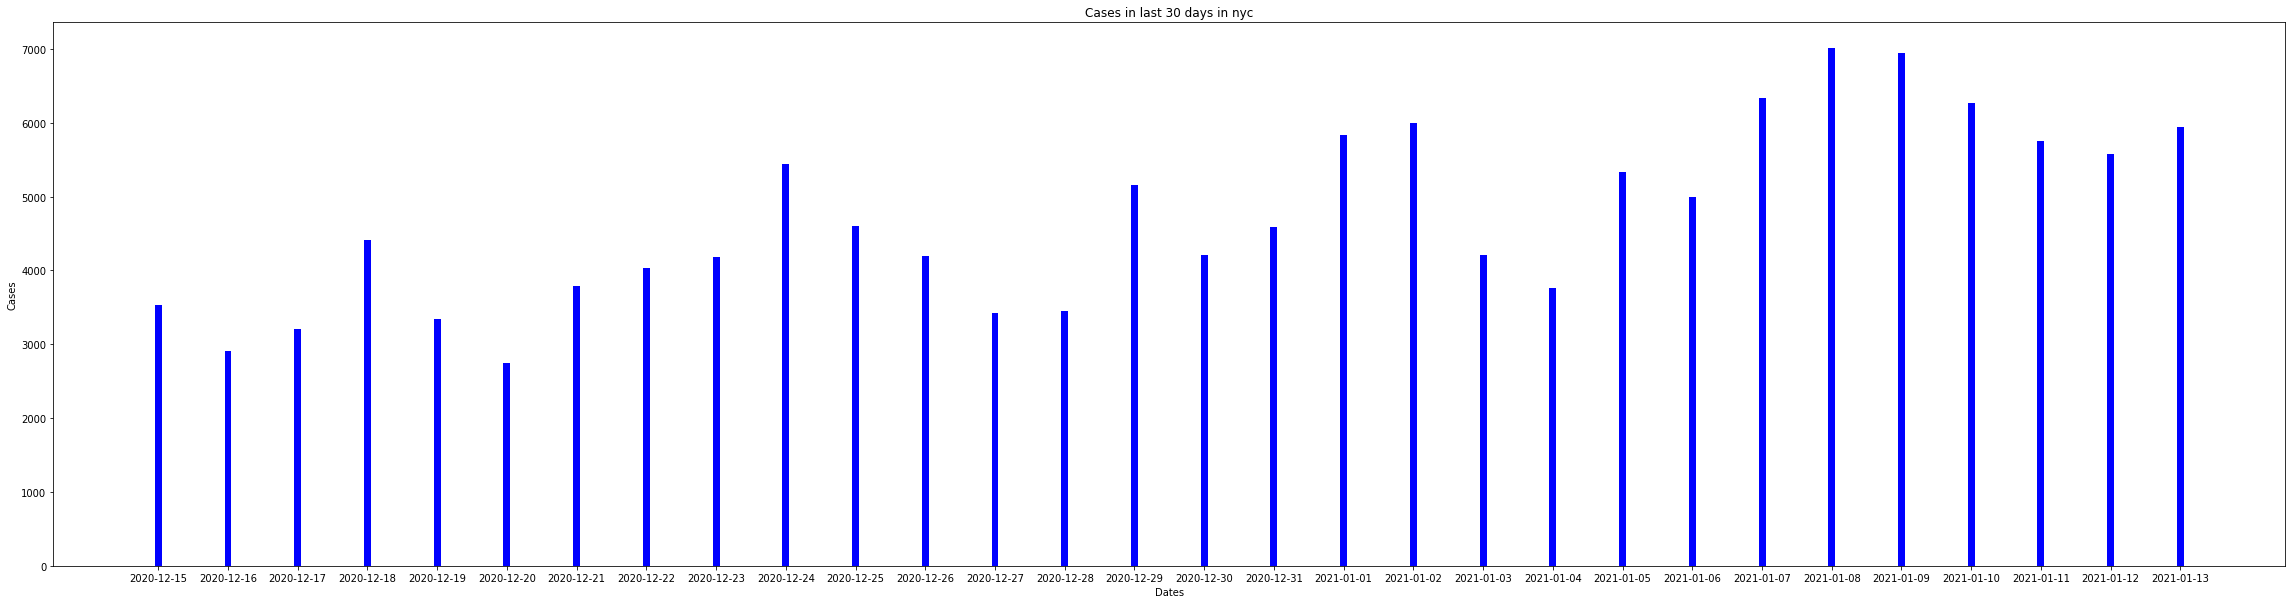

In [ ]:
import matplotlib.pyplot as plt

x = (nyc["date"].iloc[-30:])
y =[]
k=nyc["cases"].iloc[-31]
for i in  nyc["cases"].iloc[-30:]:
  y.append(i-k)
  k=i

import numpy as np 
  
   
fig = plt.figure(figsize = (40, 10)) 
  
# creating the bar plot 
plt.bar(x, y, color ='blue',  
        width = 0.1) 
  
plt.xlabel("Dates") 
plt.ylabel("Cases") 
plt.title("Cases in last 30 days in nyc") 
plt.show() 

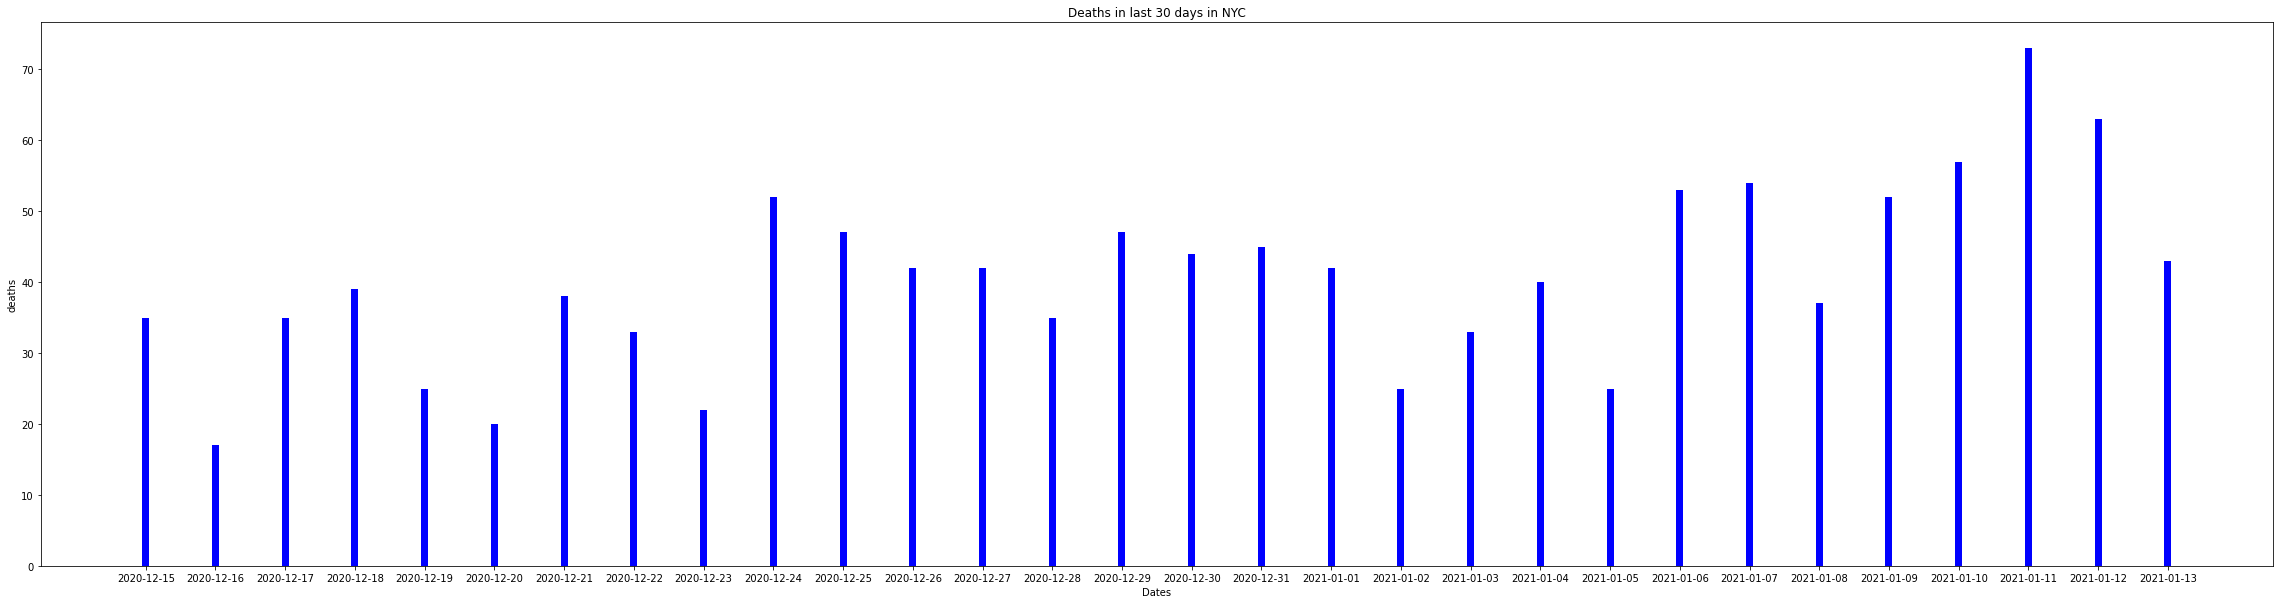

In [ ]:
import matplotlib.pyplot as plt

x = (nyc["date"].iloc[-30:])
y =[]
k=nyc["deaths"].iloc[-31]
for i in  nyc["deaths"].iloc[-30:]:
  y.append(i-k)
  k=i

import numpy as np 
import matplotlib.pyplot as plt  
  
   
fig = plt.figure(figsize = (40, 10)) 
  
# creating the bar plot 
plt.bar(x, y, color ='blue',  
        width = 0.1) 
  
plt.xlabel("Dates") 
plt.ylabel("deaths") 
plt.title("Deaths in last 30 days in NYC") 
plt.show() 

In [ ]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


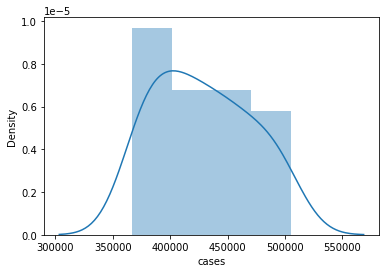

In [ ]:
sns.distplot(df_nyc['cases'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


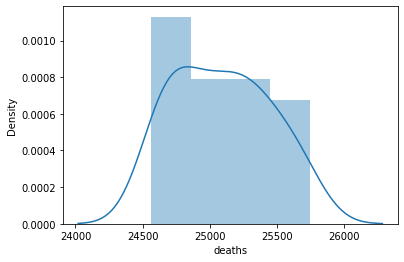

In [ ]:
sns.distplot(df_nyc['deaths'])

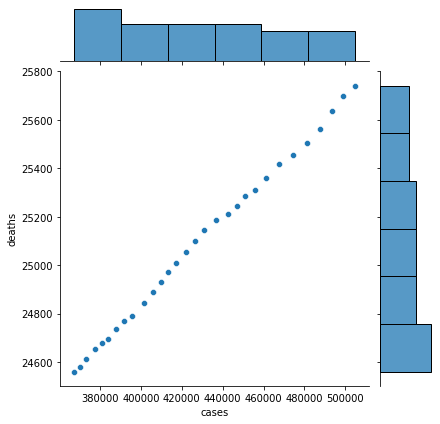

In [ ]:
sns.jointplot(x='cases', y='deaths', data=df_nyc)

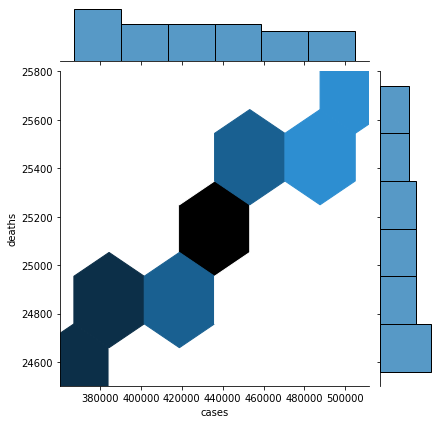

In [ ]:
sns.jointplot(x='cases', y='deaths', data=df_nyc, kind='hex')

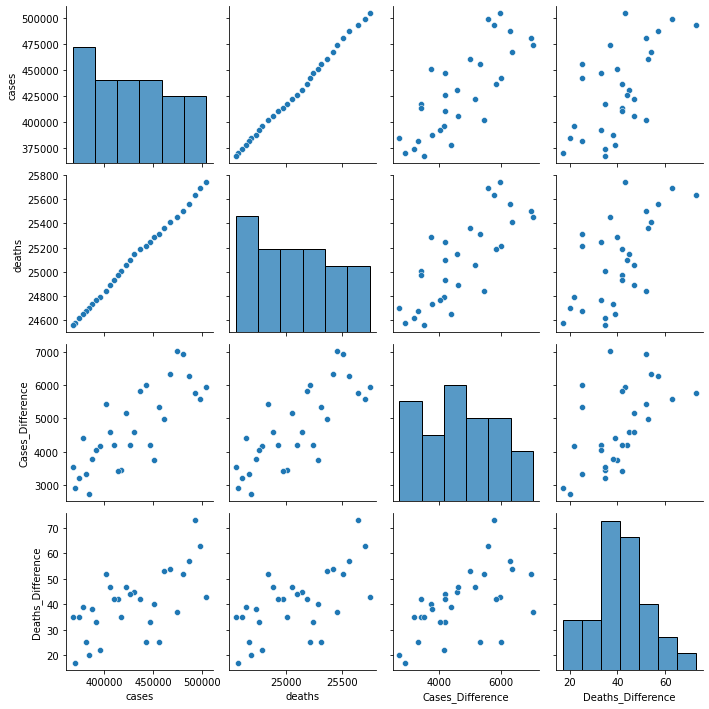

In [ ]:
sns.pairplot(df_nyc)

In [ ]:
df_ny = df[df['state'] == "New York"].copy()
df_ny

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
925661,2021-01-13,Washington,New York,36115.0,1313,20.0
925662,2021-01-13,Wayne,New York,36117.0,3395,48.0
925663,2021-01-13,Westchester,New York,36119.0,80145,1750.0
925664,2021-01-13,Wyoming,New York,36121.0,1905,36.0


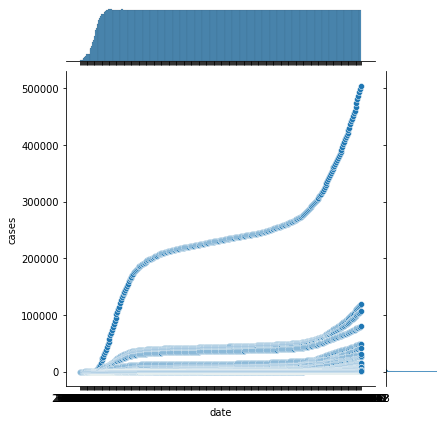

In [ ]:
sns.jointplot(x='date', y='cases', data=df_ny)

In [ ]:
df_ca = df[df['state'] == "California"].copy()
df_ca

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
10,2020-01-26,Orange,California,6059.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0
15,2020-01-27,Orange,California,6059.0,1,0.0
...,...,...,...,...,...,...
924001,2021-01-13,Tulare,California,6107.0,39347,482.0
924002,2021-01-13,Tuolumne,California,6109.0,3270,36.0
924003,2021-01-13,Ventura,California,6111.0,55342,388.0
924004,2021-01-13,Yolo,California,6113.0,9857,131.0


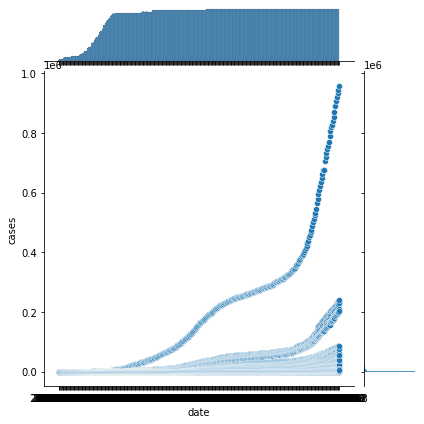

In [ ]:
sns.jointplot(x='date', y='cases', data=df_ca)

In [ ]:
df_al = df[df['state'] == "Alaska"].copy()
df_al

,date,county,state,fips,cases,deaths
1364,2020-03-12,Anchorage,Alaska,2020.0,1,0.0
1624,2020-03-13,Anchorage,Alaska,2020.0,1,0.0
1940,2020-03-14,Anchorage,Alaska,2020.0,1,0.0
2317,2020-03-15,Anchorage,Alaska,2020.0,1,0.0
2746,2020-03-16,Anchorage,Alaska,2020.0,1,0.0
...,...,...,...,...,...,...
923852,2021-01-13,Southeast Fairbanks Census Area,Alaska,2240.0,408,3.0
923853,2021-01-13,Unknown,Alaska,NaN,348,1.0
923854,2021-01-13,Valdez-Cordova Census Area,Alaska,2261.0,379,2.0
923855,2021-01-13,Wrangell City and Borough,Alaska,2275.0,24,0.0


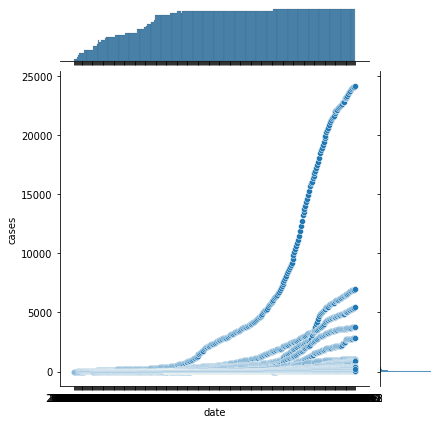

In [ ]:
sns.jointplot(x='date', y='cases', data=df_al)

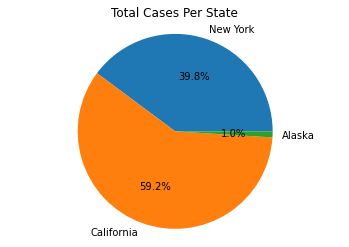

In [ ]:
import matplotlib.pyplot as plt
ny = df[df['state'] == "New York"]
nycasestotal = ny['cases'].sum()
cali = df[df['state'] == "California"]
calicasestotal = cali['cases'].sum()
alas = df[df['state'] == "Alaska"]
alascasestotal = alas['cases'].sum()

my_data = [nycasestotal,calicasestotal,alascasestotal]
my_labels = 'New York','California','Alaska'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Total Cases Per State')
plt.axis('equal')
plt.show()

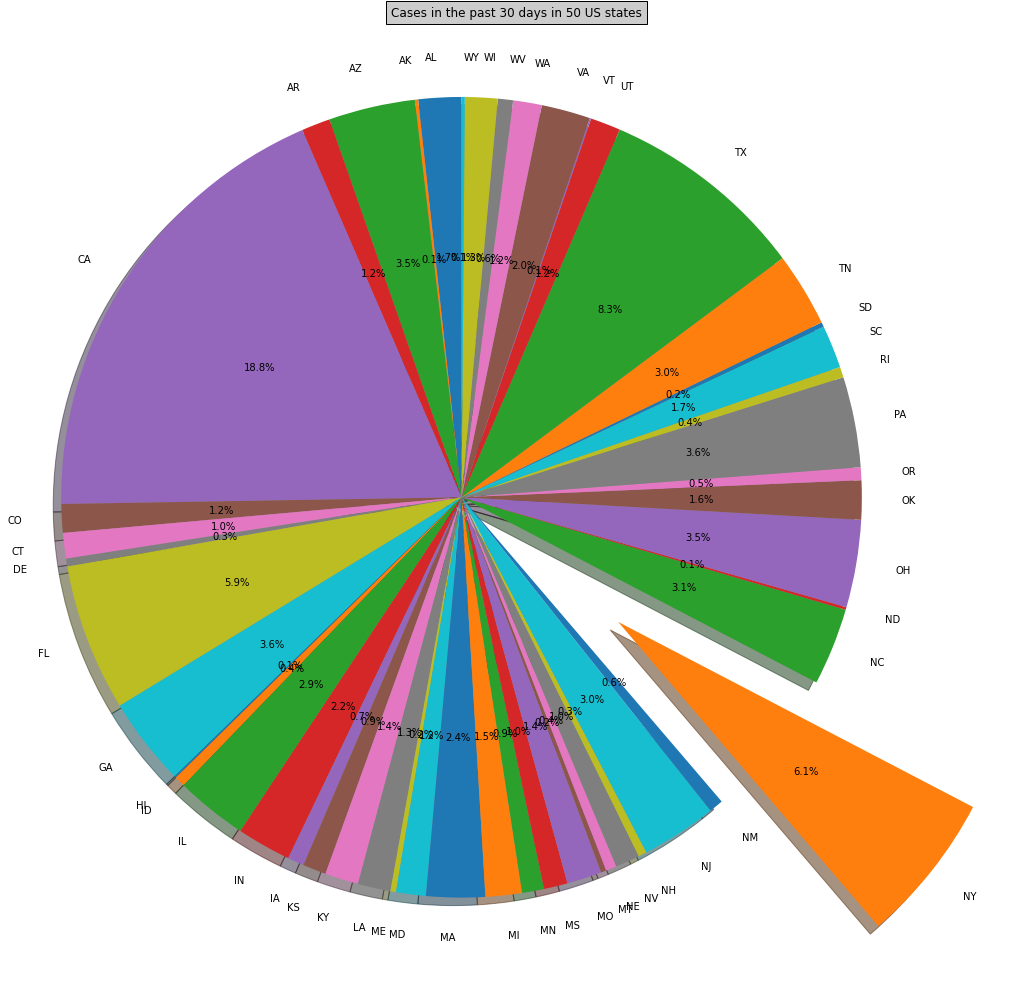

In [ ]:
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cases_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]

    cases_us_states.append(((currState['cases'].where(currState["date"]==yesterday)).sum())-((currState['cases'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cases_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Cases in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()


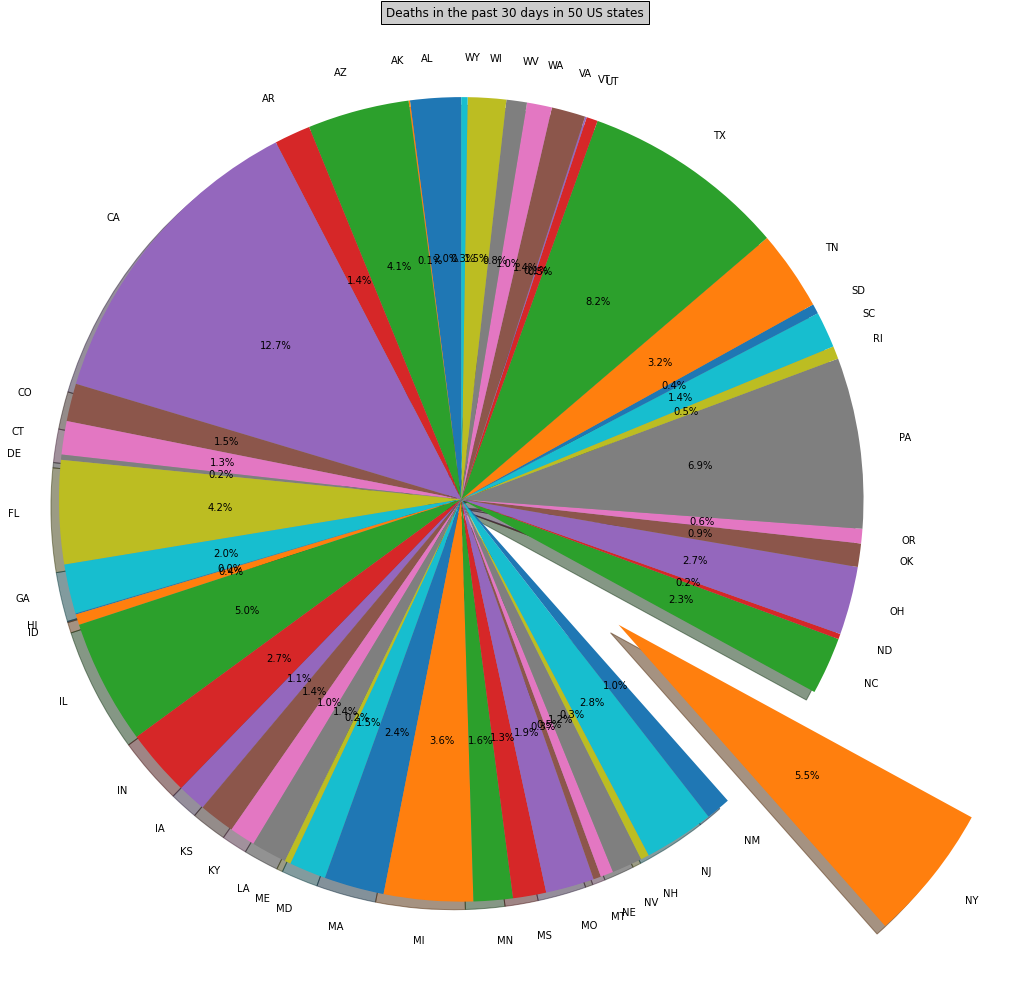

In [ ]:
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

deaths_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]
    deaths_us_states.append(((currState['deaths'].where(currState["date"]==yesterday)).sum())-((currState['deaths'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(deaths_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Deaths in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()




No handles with labels found to put in legend.


Enter the number of states you want to compare: 2
Enter 1st state with first letter in uppercase of each word: New York
Enter 2st state with first letter in uppercase of each word: Idaho


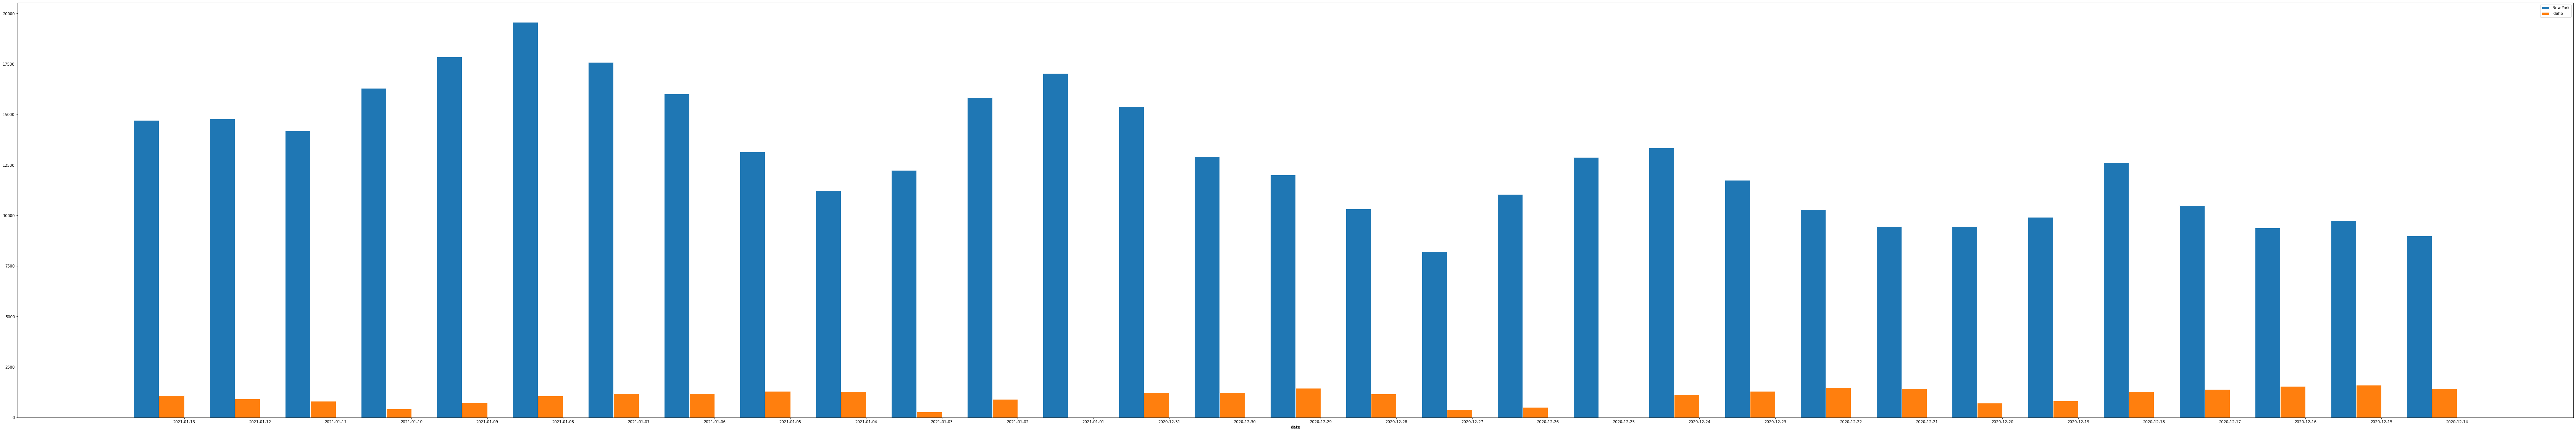

In [ ]:
from datetime import date, timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(120,20))
ax.legend(fontsize = 12)
numcomp = int(input("Enter the number of states you want to compare: "))
user_states=[]
for i in range(numcomp+1):
  if i<=3:
        if i==1:
          user_states.append(input("Enter 1st state with first letter in uppercase of each word: "))
        elif i==2:
          user_states.append(input("Enter 2st state with first letter in uppercase of each word: "))
        elif i==3:
          user_states.append(input("Enter 3st state with first letter in uppercase of each word: "))
  else:
      user_states.append(input(f"Enter {i}th state with first letter in uppercase of each word: "))
  

dates_list=[]
for i in range(2,34):
  dates_list.append((date.today()-timedelta(days=i)).isoformat())

cases_per_day=[[0] * 31 for i in range(numcomp)]
#for i in range (2,32):
  #(currState['cases'].where(currState["cases"]==yesterday)).sum())-((currState['cases'].where(currState["cases"]==thirtydaysago)).sum()
row_counter=0
for state in user_states:
  curr_state_df = df[df['state'] == state]
  inner_index=0
  for day in range(len(dates_list)):
    if day==(len(dates_list)-1):
      continue
    else:
      cases_per_day[row_counter][inner_index]=(((curr_state_df['cases'].where(curr_state_df["date"]==dates_list[day])).sum())-((curr_state_df['cases'].where(curr_state_df["date"]==dates_list[day+1])).sum()))
      inner_index+=1
  row_counter=row_counter+1

#Starting to make bar chart
barWidth = 0.25  # the width of the bars
#setting the position for the bars
pos_dist= barWidth*numcomp+barWidth
stop_pt=(pos_dist)*len(cases_per_day[0])
position_list=[]
position_list.append([np.arange(start=0,stop=stop_pt,step= pos_dist)])

#position_list.append([np.arange(len(cases_per_day[0]))])
for state_ind in range(1,len(user_states)):
    position_list.append([x + barWidth for x in position_list[state_ind-1]])

#making the plot
for state_ind in range(len(user_states)):
  plt.bar(position_list[state_ind][0],cases_per_day[state_ind] , width=barWidth, edgecolor='white', label=user_states[state_ind])

# Add xticks on the middle of the group bars
plt.xlabel('date', fontweight='bold')
if(numcomp<10):
  plt.xticks([pos_dist*r+pos_dist*.5 for r in range(len(cases_per_day[0]))], dates_list)
# Create legend & Show graphic
plt.legend()
plt.show()


